<img src="lgm.jpg" alt="LetGrowMore Logo"/>


## Submitted By: Zyad Wael



# **1. Importing Libraries**

In [1]:
# IMPORTING ALL THE NECESSARY LIBRARIES FOR OUR PROJECT
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


# **2.    Data Preprocessing**

In [2]:
# naming the columns
columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species_Labels']

# loading the dataset
df = pd.read_csv('iris.data', names=columns)


In [3]:
# Display the first 5 rows
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species_Labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Display a summary of the statistical measures
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sepal_Length    150 non-null    float64
 1   Sepal_Width     150 non-null    float64
 2   Petal_Length    150 non-null    float64
 3   Petal_Width     150 non-null    float64
 4   Species_Labels  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Display the shape of the DataFrame
df.shape

(150, 5)

In [7]:
# Count the number of missing values in each column
df.isnull().sum()


Sepal_Length      0
Sepal_Width       0
Petal_Length      0
Petal_Width       0
Species_Labels    0
dtype: int64

# **3. Exploratory Data Analysis**

### 3.1 Iris Distribution

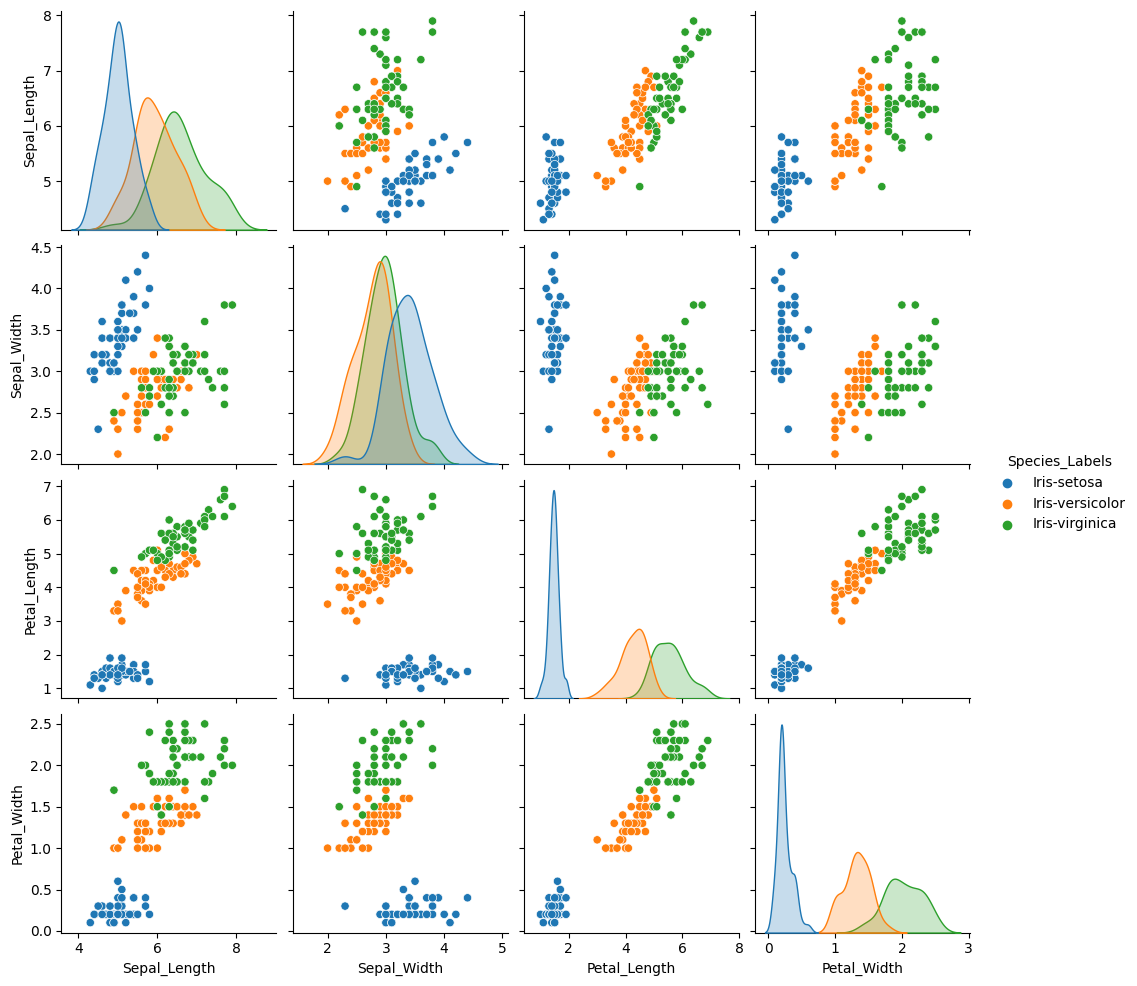

In [8]:
# Generate the pair plot
sns.pairplot(df, hue='Species_Labels')

# Display the plot
plt.show()

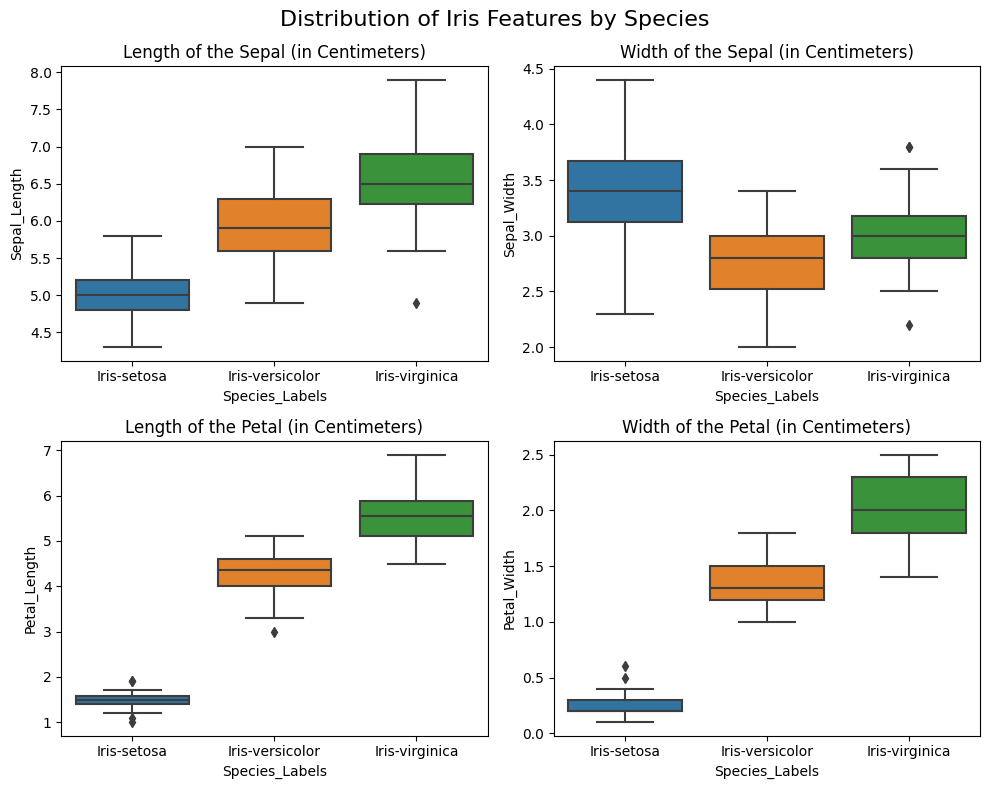

In [9]:


# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle("Distribution of Iris Features by Species", fontsize=16)

# Create subplots for each feature
sns.boxplot(ax=axes[0, 0], x='Species_Labels', y='Sepal_Length', data=df)
axes[0, 0].set_title("Length of the Sepal (in Centimeters)")

sns.boxplot(ax=axes[0, 1], x='Species_Labels', y='Sepal_Width', data=df)
axes[0, 1].set_title("Width of the Sepal (in Centimeters)")

sns.boxplot(ax=axes[1, 0], x='Species_Labels', y='Petal_Length', data=df)
axes[1, 0].set_title("Length of the Petal (in Centimeters)")

sns.boxplot(ax=axes[1, 1], x='Species_Labels', y='Petal_Width', data=df)
axes[1, 1].set_title("Width of the Petal (in Centimeters)")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the combined plot
plt.show()


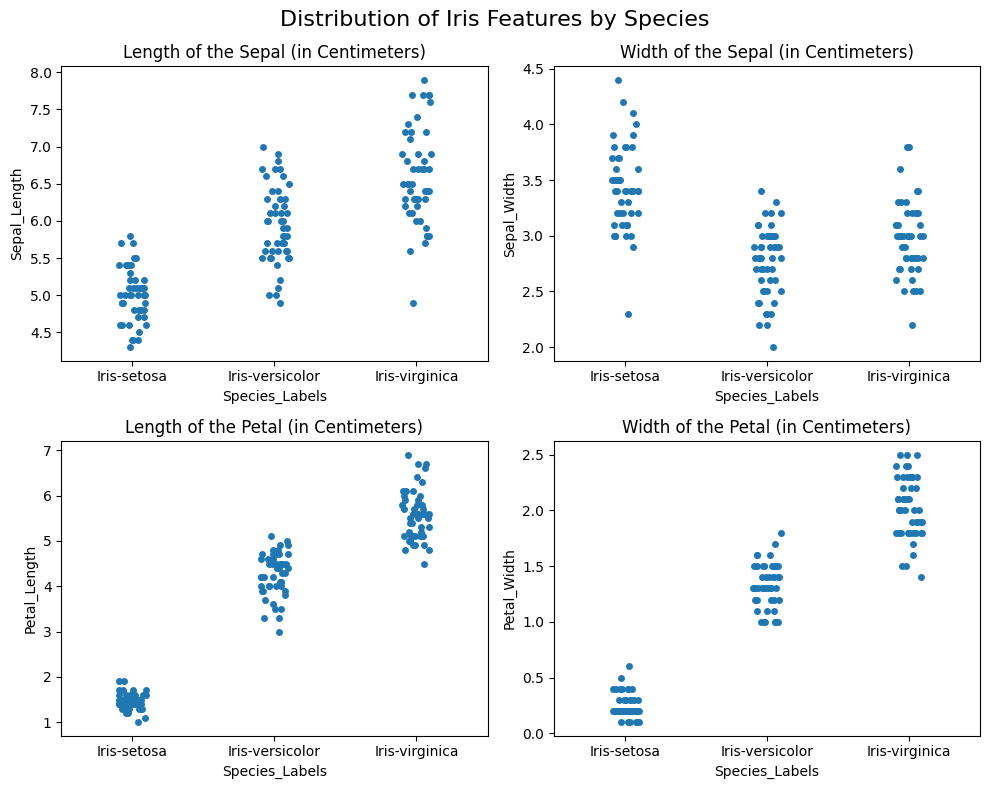

In [10]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle("Distribution of Iris Features by Species", fontsize=16)

# Create subplots for each feature
sns.stripplot(ax=axes[0, 0], x='Species_Labels', y='Sepal_Length', data=df)
axes[0, 0].set_title("Length of the Sepal (in Centimeters)")

sns.stripplot(ax=axes[0, 1], x='Species_Labels', y='Sepal_Width', data=df)
axes[0, 1].set_title("Width of the Sepal (in Centimeters)")

sns.stripplot(ax=axes[1, 0], x='Species_Labels', y='Petal_Length', data=df)
axes[1, 0].set_title("Length of the Petal (in Centimeters)")

sns.stripplot(ax=axes[1, 1], x='Species_Labels', y='Petal_Width', data=df)
axes[1, 1].set_title("Width of the Petal (in Centimeters)")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the combined plot
plt.show()

### 3.2 Iris Histogram

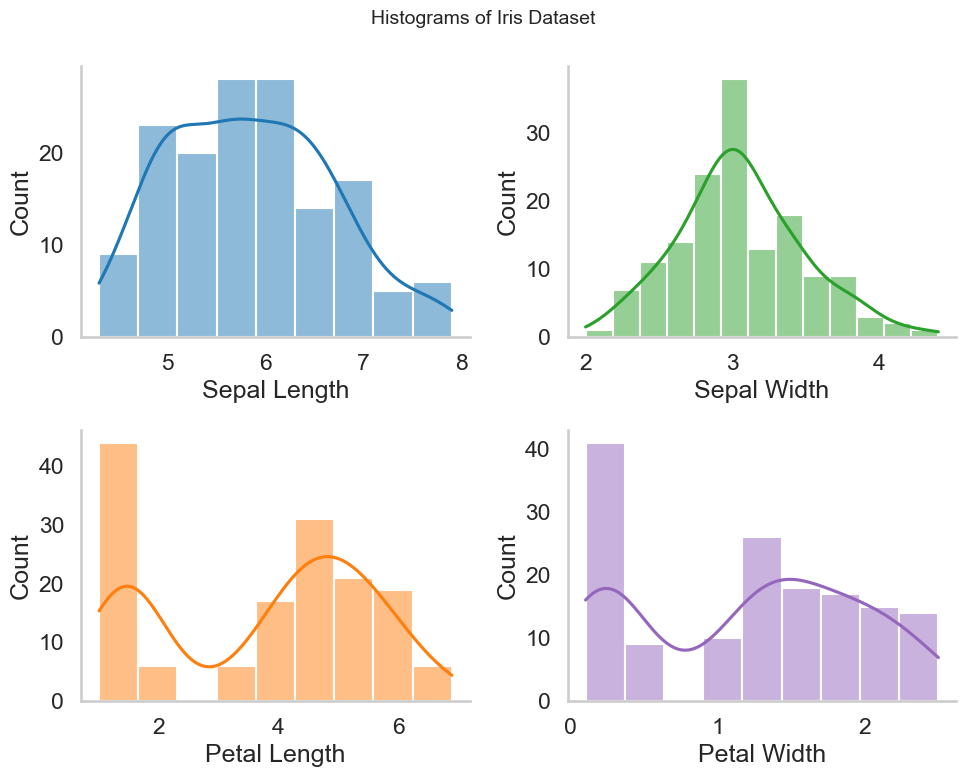

In [11]:
# Set the style and context for the plot
sns.set(style='whitegrid', context='talk')

# Create a figure and axes
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot histograms for each column
sns.histplot(ax=axes[0, 0], data=df, x='Sepal_Length', color='#1f77b4', kde=True)
sns.histplot(ax=axes[0, 1], data=df, x='Sepal_Width', color='#2ca02c', kde=True)
sns.histplot(ax=axes[1, 0], data=df, x='Petal_Length', color='#ff7f0e', kde=True)
sns.histplot(ax=axes[1, 1], data=df, x='Petal_Width', color='#9467bd', kde=True)

# Set labels for each subplot
axes[0, 0].set_xlabel('Sepal Length')
axes[0, 1].set_xlabel('Sepal Width')
axes[1, 0].set_xlabel('Petal Length')
axes[1, 1].set_xlabel('Petal Width')

# Remove spines and ticks from subplots
sns.despine(ax=axes[0, 0])
sns.despine(ax=axes[0, 1])
sns.despine(ax=axes[1, 0])
sns.despine(ax=axes[1, 1])

# Remove grids from subplots
axes[0, 0].grid(False)
axes[0, 1].grid(False)
axes[1, 0].grid(False)
axes[1, 1].grid(False)

# Add main plot title
fig.suptitle('Histograms of Iris Dataset', fontsize=14)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# **4. Machine Learning** 

In [12]:
# Converting categorical variables into numerical format
# Create a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the original labels
encoded_labels = label_encoder.fit_transform(df['Species_Labels'])

In [13]:
# Create a new DataFrame 'x' by dropping the 'Species_Labels' column from the original DataFrame 'df'
X = df.drop(['Species_Labels'], axis=1)

# Create a new Series 'y' containing only the 'Species_Labels' column from the original DataFrame 'df'
Y = df['Species_Labels']

# Print the shape (number of rows and columns) of the DataFrame 'x' and the Series 'y'
print(f'X shape: {X.shape} | Y shape: {Y.shape}')


X shape: (150, 4) | Y shape: (150,)


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=1)


### 4.1 Logistic Regression 



In [15]:
# Create and train the Logistic Regression model
LR_model = LogisticRegression()
LR_model.fit(X_train, Y_train)
LR_model_prediction = LR_model.predict(X_test)
LR_accuracy = round(accuracy_score(Y_test, LR_model_prediction) * 100, 2)
print('The accuracy of the Logistic Regression is', LR_accuracy,'%')


The accuracy of the Logistic Regression is 96.67 %


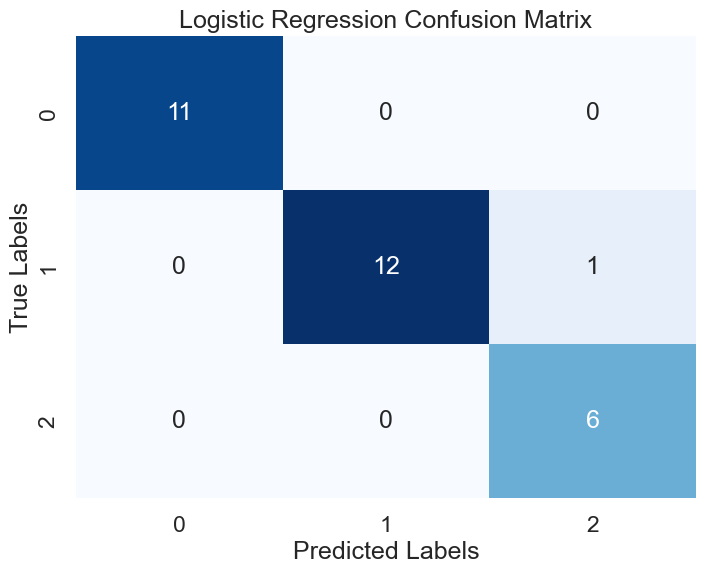

In [16]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, LR_model_prediction)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


### 4.2 Decision Tree

In [17]:
# Create and train the Decision Tree model

DCT_model = DecisionTreeClassifier()
DCT_model.fit(X_train, Y_train)
DCT_model_prediction = DCT_model.predict(X_test)
DCT_accuracy = round(accuracy_score(Y_test, DCT_model_prediction) * 100, 2)
print('The accuracy of the Decision Tree is', DCT_accuracy,'%')

The accuracy of the Decision Tree is 96.67 %


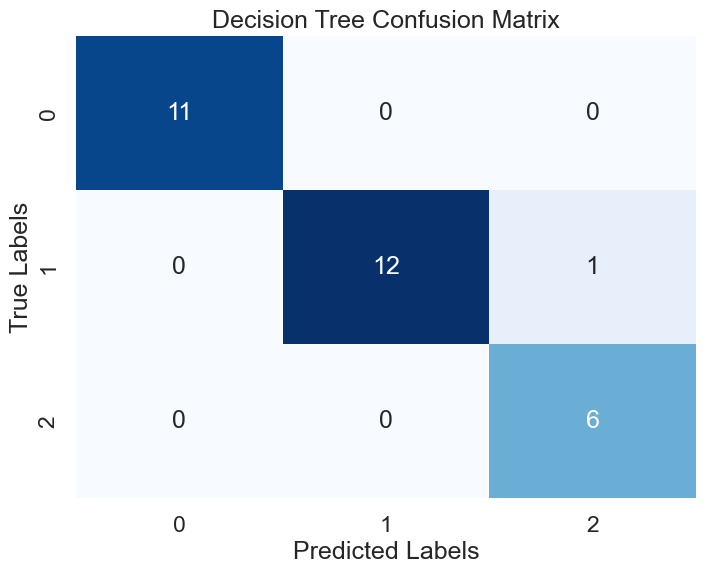

In [18]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, DCT_model_prediction)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Decision Tree Confusion Matrix')
plt.show()


### 4.3 Support Vector Machine

In [19]:
# Create and train the SVM model
SVC_model = SVC()
SVC_model.fit(X_train, Y_train)
SVC_model_prediction = SVC_model.predict(X_test)

SVC_accuracy = round(accuracy_score(Y_test, SVC_model_prediction) * 100, 2)
print('The accuracy of the Supporrt Vector Machine is', SVC_accuracy,'%')

The accuracy of the Supporrt Vector Machine is 96.67 %


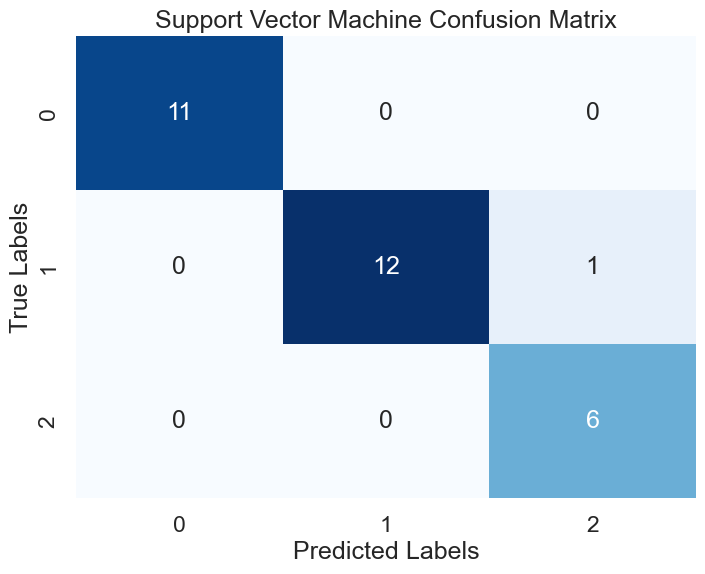

In [20]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, SVC_model_prediction)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()


### 4.4 k-Nearest Neighbours

In [21]:
# Create and train the KNN model
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, Y_train)
KNN_model_prediction = KNN_model.predict(X_test)
KNN_accuracy = round(accuracy_score(Y_test, KNN_model_prediction) * 100, 2)

# Ignore FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning)
print('The accuracy of the k-Nearest Neighbors is', KNN_accuracy, '%')






The accuracy of the k-Nearest Neighbors is 100.0 %


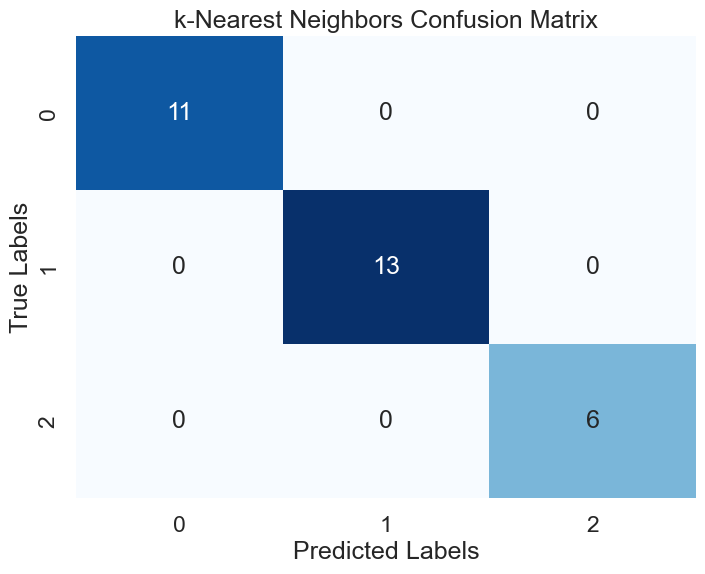

In [22]:
conf_matrix = confusion_matrix(Y_test, KNN_model_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('k-Nearest Neighbors Confusion Matrix')
plt.show()

# **5. Models Comparison & Classification Report**

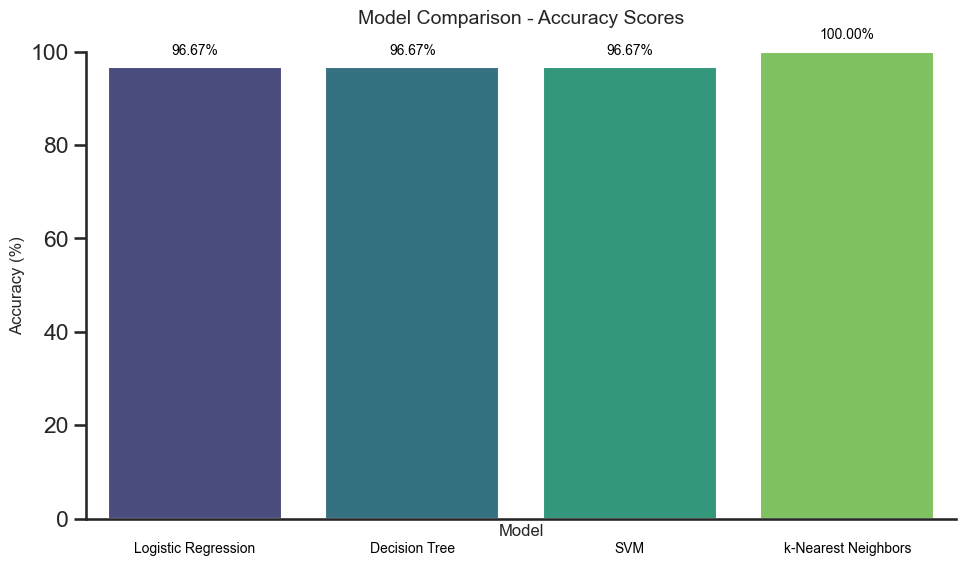

In [23]:
# Define the model names and accuracy scores
model_names = ['Logistic Regression', 'Decision Tree', 'SVM', 'k-Nearest Neighbors']
accuracy_scores = [LR_accuracy, DCT_accuracy, SVC_accuracy, KNN_accuracy]

# Set the style and context for the plot
sns.set(style='ticks', context='talk')

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the accuracy scores as a bar plot
sns.barplot(x=model_names, y=accuracy_scores, ax=ax, palette='viridis')

# Add labels and title to the plot
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Model Comparison - Accuracy Scores', fontsize=14, pad=20)

# Set the y-axis limits
ax.set_ylim([0, 100])

# Add data labels and model names to the bars
for i, score in enumerate(accuracy_scores):
    ax.text(i, score + 2, f'{score:.2f}%', ha='center', va='bottom', fontsize=10, color='black')
    ax.text(i, -5, model_names[i], ha='center', va='top', fontsize=10, color='black')

# Remove the spines
sns.despine(top=True, right=True)

# Remove ticks and labels for x-axis
ax.tick_params(axis='x', bottom=False, labelbottom=False)

# Show the plot
plt.tight_layout()
plt.show()


In [24]:
report = classification_report(Y_test, KNN_model_prediction)
print("KNN Classification Report:")
print(report)

KNN Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [25]:
report = classification_report(Y_test, SVC_model_prediction)
print("SVM Classification Report:")
print(report)

SVM Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [26]:
report = classification_report(Y_test, DCT_model_prediction)
print("Decision Tree Classification Report:")
print(report)

Decision Tree Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [27]:
report = classification_report(Y_test, LR_model_prediction)
print("Logistic Regression Classification Report:")
print(report)

Logistic Regression Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



# **6. Test Run** 

In [28]:

Test_inputs = np.array([[3,2,1,0.2],[4.9,2.2,3.8,1.1],[5.3,2.5,4.6,1.9]])
Test_feature_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

# Create a DataFrame with the new input array and feature names
Test_df = pd.DataFrame(Test_inputs, columns=Test_feature_names)

# Predict the species using the Decision Tree model
Test_prediction = DCT_model.predict(Test_df)

print("Prediction of Species:", Test_prediction)


Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# **7. Conclusion**

*   Our dataset was not very large and consisted of only 150 rows, with all the 3 species uniformly distributed.
*   PetalWidthCm was highly correlated with PetalLengthCm

*   PetalLengthCm was highly correlated with PetalWidthCm
*   Tried with 4 different machine learning Classification models on the Iris Test data set to classify the flower into it's three species:

      a) Iris Setosa

      b) Iris Versicolour

      c) Iris Virginica,

      based on the length and width of the flower's Petals and Sepals.​
 
*   We got very high accuracy score for all the models, and even the accuracy score of 100 for KNN with some hyper parameter tuning maybe due to small size of dataset.

